In [1]:
# Required Libraries
import cv2 as cv 
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
gaussianNoiseImage = cv.imread("Images/GaussianNoise.jpg",cv.IMREAD_GRAYSCALE)
m,n = gaussianNoiseImage.shape

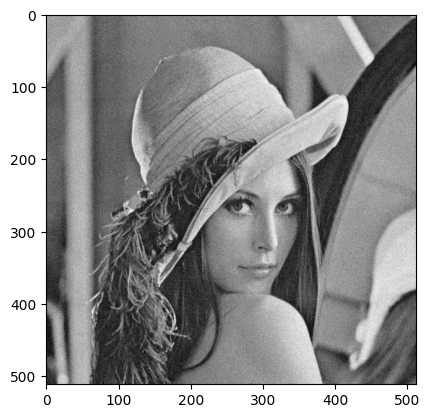

In [3]:
plt.imshow(gaussianNoiseImage,cmap='gray',vmin=0,vmax=255)

# Required:
1) Variance of noise (Assume it "0.001225") = varNoise
2) Local Average intensity of pixels (In Sxy) = locIntensity
3) Local Variance of the intensities of pixels (In Sxy) = locVariance

# Calculation
Filtered_Value = Image_Value - (varNoise *(Image_Value-locIntensity)) / locVariance

In [4]:
# Border padding for 5 by 5 filter
def border_padding_5_5(image):
    top_line = image[0]
    bottom_line = image[-1]
    image_upper_padding = np.vstack((top_line,top_line,image,bottom_line,bottom_line))

    # Pad left and right
    left_line = image_upper_padding[:,0]
    right_line = image_upper_padding[:,-1]
    return np.column_stack((left_line,left_line,image_upper_padding,right_line,right_line))

def normalizeImageMatrix(image):
    normImage = (image/255.0)
    return normImage.astype(np.single)



In [5]:
def adaptive_mean_filter_5_5(image, variance_of_noise):
    normImage = normalizeImageMatrix(image)
    normImage_padded = border_padding_5_5(normImage) 
    m,n = normImage.shape
    filtered_image_norm = np.zeros((m,n)).astype(np.single)
    for i in range(m):
        for j in range(n):
            slice = normImage_padded[i:i+5,j:j+5].flatten()
            mean_of_slice = np.mean(slice) 
            var_of_slice = np.var(slice)
            filtered_image_norm[i][j] = normImage[i][j] - (variance_of_noise*(normImage[i][j]  - mean_of_slice)) / var_of_slice
    
    filteredImageResult =  (filtered_image_norm*255).astype(np.uint8)
    return filteredImageResult

(-0.5, 511.5, 511.5, -0.5)

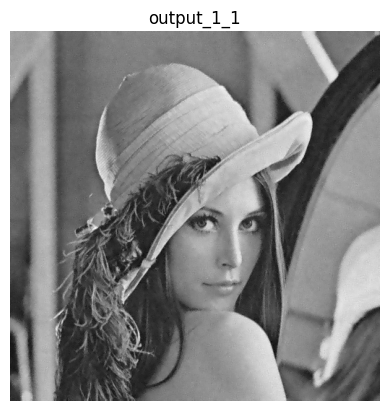

In [6]:
filteredImage = adaptive_mean_filter_5_5(gaussianNoiseImage,0.001225)
plt.imshow(filteredImage,cmap='gray',vmin=0,vmax=255)
plt.title("output_1_1")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

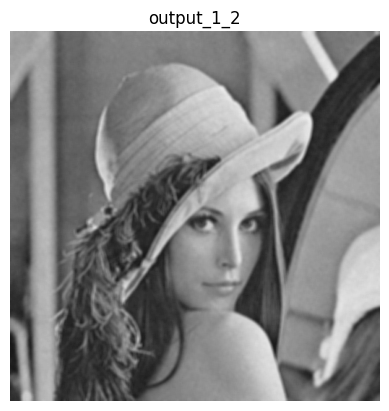

In [7]:
# Box filter
padding_size = 2
kernel = np.ones((5,5),np.float32)/(25)
image_padded_5_5 = cv.copyMakeBorder(gaussianNoiseImage,padding_size,padding_size,padding_size,padding_size,cv.BORDER_REPLICATE)
dst_box = cv.filter2D(image_padded_5_5,-1,kernel)
box_filter = dst_box[padding_size:-padding_size,padding_size:-padding_size]

plt.imshow(box_filter,cmap='gray',vmin=0,vmax=255)
plt.title("output_1_2")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

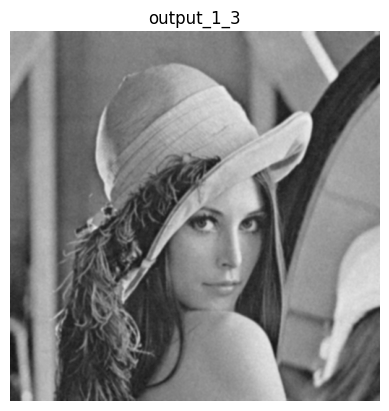

In [8]:
# Gauss Filter
padding_size = 2
image_padded_5_5 = cv.copyMakeBorder(gaussianNoiseImage,padding_size,padding_size,padding_size,padding_size,cv.BORDER_REPLICATE)
sigma = 0.0  # Standart sapmayı ayarlama

dst_gauss = cv.GaussianBlur(image_padded_5_5, (5,5), sigma)
gauss_filtered = dst_gauss[padding_size:-padding_size,padding_size:-padding_size]

plt.imshow(gauss_filtered,cmap='gray',vmin=0,vmax=255)
plt.title("output_1_3")
plt.axis('off')

In [9]:
# Compare 3 filters by getting PSNRs
original_image = cv.imread("Images/cleanImage.jpg",cv.IMREAD_GRAYSCALE)

# Calculate PSNR
psnr_my_adaptive_mean_filter = cv.PSNR(original_image, filteredImage)
psnr_box_filter = cv.PSNR(original_image, box_filter)
psnr_gaussian_filter = cv.PSNR(original_image, gauss_filtered)

print("PSNR: My Adaptive Mean (5x5)", psnr_my_adaptive_mean_filter)
print("PSNR: Box Filter (5x5)", psnr_box_filter)
print("PSNR: Gaussian Filter (5x5)", psnr_gaussian_filter)


PSNR: My Adaptive Mean (5x5) 27.076054815271455
PSNR: Box Filter (5x5) 24.914370966889905
PSNR: Gaussian Filter (5x5) 26.111662886371224


As we see adaptive mean filter denoise better than other 2 filters in this scenario.